Codigo utilizado del repositorio en github : https://github.com/clementbernardd/Count-Based-Exploration/blob/main/notebooks/DQN.ipynb              

# Importando


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
%matplotlib inline
import torch 
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import os 
import collections
!pip install tensor-dash
from tensordash.tensordash import Tensordash


import sys
# Import python files 
!wget https://github.com/clementbernardd/Count-Based-Exploration/raw/main/zip/python.zip
!unzip python.zip
!rm python.zip
!mkdir models
!mkdir results

sys.path.append('/content/python')

from RL_algorithm import *
from utils import * 
from buffer import * 
from dqn_agent import *
from qnetwork import *
from state import *
from simhash import * 
from train import * 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

--2021-12-05 15:29:45--  https://github.com/clementbernardd/Count-Based-Exploration/raw/main/zip/python.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/zip/python.zip [following]
--2021-12-05 15:29:45--  https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/zip/python.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38240 (37K) [application/zip]
Saving to: ‘python.zip’

python.zip          100%[===================>]  37.34K  --.-KB/s    in 0.003s  

2021-12-05 15:29:45 (12.5 MB/s) - ‘python.zip’ saved [38240/38240]

Arc

# Entornos


In [ ]:
# Mountain Car 
# env = gym.make('MountainCar-v0')
# env = gym.make('CartPole-v0')
# Mountain Car Continuous
# env = gym.make('MountainCarContinuous-v0')
# CartPoleSwingUp
# env = gym.make("CartPoleSwingUp-v0")
# Acrobot
# env = gym.make('Acrobot-v1')
# Pendulum
# env = gym.make('Pendulum-v0')

# env = gym.make("Taxi-v3").env

In [ ]:
ENVS = {'acrobot' : gym.make('Acrobot-v1') ,\
        'cartpole' : gym.make('CartPole-v0'),
        'mountain' : gym.make('MountainCar-v0')}

In [ ]:
NAME_ALGORITHM = 'dqn'
SEEDS = [77,7,17,75,73,2,11,89,99,6]

In [ ]:
create_files(ENVS, NAME_ALGORITHM)

# Deep Q-Network (DQN)

![picture](https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/images/dqn.png)

# Exploración basada en conteo

![picture](https://github.com/clementbernardd/Count-Based-Exploration/raw/main/images/algorithm1.png)

# DQN hiperparámetros

In [ ]:
HP = {'acrobot' : {
            'BUFFER_SIZE' : 500,
            'state_emb' : 64,
            'hidden_size' : 64,
            'batch_size' : 32,
            'gamma' : 0.99,
            'optimizer' : optim.Adam,
            'criterion' : nn.MSELoss(),
            'lr' : 1e-3 ,
            'device' : device,
            'k' : 16,
            'beta' : 0.1
            },
      'cartpole' : 
      {
         'BUFFER_SIZE' : 500,
          'state_emb' : 64,
          'hidden_size' : 128,
          'batch_size' : 64,
          'gamma' : 0.99,
          'optimizer' : optim.Adam,
          'criterion' : nn.MSELoss(),
          'lr' : 1e-3,
          'device' : device,
          'k' : 32,
          'beta' : 0.1,
      },
      'mountain' : 
      {
        'BUFFER_SIZE' : 1000,
        'state_emb' : 64,
        'hidden_size' : 64,
        'batch_size' : 64,
        'gamma' : 0.99,
        'optimizer' : optim.Adam,
        'criterion' : nn.MSELoss(),
        'lr' : 1e-3,
        'device' : device,
        'k' : 16   ,
        'beta' : 0.1
      }
}

In [ ]:
all_means = {env : None for env in ENVS}
all_means_cb = {env : None for env in ENVS}
all_hash_cb = {env : None for env in ENVS}

# Entorno del Acrobot

In [ ]:
CURRENT_ENV = list(ENVS.keys())[0]

In [ ]:
all_means[CURRENT_ENV], _ = train_all_deep(DQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                      TRAIN = Train, count_based= False)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


In [ ]:
all_means_cb[CURRENT_ENV], all_hash_cb[CURRENT_ENV] = train_all_deep(DQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,\
                                                                env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                                                TRAIN = Train, count_based= True)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


## Recompensas

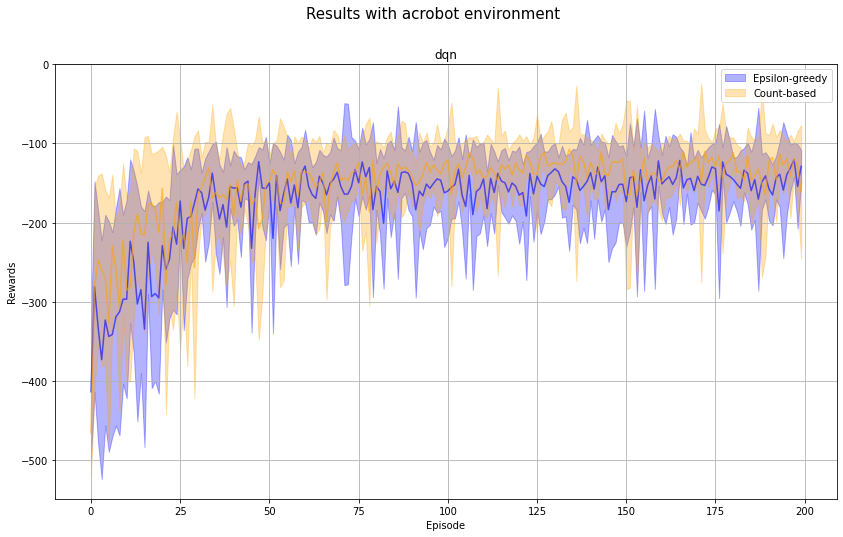

In [ ]:
plot_rewards([all_means[CURRENT_ENV]], [all_means_cb[CURRENT_ENV]], names = [NAME_ALGORITHM], env_name = CURRENT_ENV)

## Histograma de los estados

In [ ]:
hashes = get_hashes_mean(all_hash_cb[CURRENT_ENV])

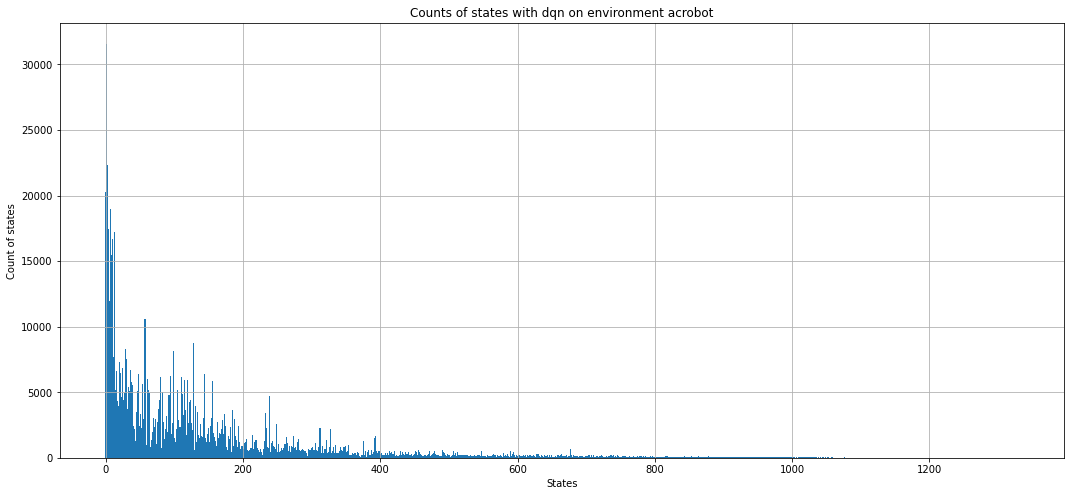

In [ ]:
plot_barchart_count_based(hashes, figsize = (18,8),method = NAME_ALGORITHM, env_name = CURRENT_ENV)